# This notebook provides interactive widgets to play with the imaging requirements for the SKA1 SDP

## First, do the necessary set-up (run the code block below, first)

In [2]:
""" These first few lines below import the IPython definitions and methods that we will use. 
Please Refer to ipython_api.py for the implementation """
from IPython.html.widgets import interact, interactive, fixed
from IPython.html.widgets.interaction import interact_manual
from IPython.html import widgets
from api_ipython import SkaIPythonAPI as iapi
from parameter_definitions import *
from parameter_definitions import Constants as c
from implementation import Implementation as imp

%matplotlib inline

# The lines below define the available telescopes, bands and modes that may be chosen.

available_teles = (Telescopes.SKA1_Low, Telescopes.SKA1_Low_old, Telescopes.SKA1_Mid, Telescopes.SKA1_Mid_old, 
                   Telescopes.SKA1_Sur_old, Telescopes.SKA2_Low, Telescopes.SKA2_Mid)
available_bands = (Bands.Low, 
                   Bands.Mid1, Bands.Mid2, Bands.Mid5A, Bands.Mid5B, 
                   Bands.Sur1)
available_modes     = (ImagingModes.Continuum, ImagingModes.Spectral, ImagingModes.FastImg)
available_modes_all = (ImagingModes.Continuum, ImagingModes.Spectral, ImagingModes.FastImg, ImagingModes.All)
verbose_display = False

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Using default values, we can compare telescopes side-by-side

Telescope,SKA1_Low_rebaselined,SKA1_Mid_rebaselined,
Band,Low,Mid1,
Mode,Continuum,Continuum,
Baseline Dependent Time Avg.,False,False,
Max Baseline,80000,150000,m
Max # channels,65536,65536,
Optimal Number of Facets,1,3,
Optimal Snapshot Time,39.4,227.7,sec.
Visibility Buffer,25,51,PetaBytes
Working (cache) memory,14.1,53.7,TeraBytes
Image side length,3.41e+04,4.97e+04,pixels


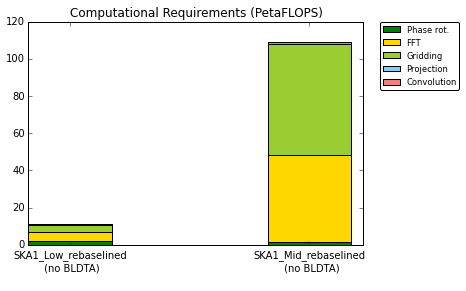

In [2]:
interact_manual(iapi.compare_telescopes_default, 
                telescope_1=available_teles, telescope_2=available_teles, band_1=available_bands,
                band_2=available_bands, mode_1=available_modes_all, mode_2=available_modes_all,
                verbose=verbose_display);

## We can also interactively play with parameters (via sliders)

### The first option is automatic updating of results as the sliders are moved. This may be sluggish

In [6]:
interact(iapi.evaluate_telescope_manual, max_baseline=(10000,200000,10000), Nf_max = (0,256000,64000), Nfacet=(1,10,1), Tsnap=(1.2,1800), 
         telescope=available_teles, band=available_bands, mode=available_modes_all, verbose=verbose_display);

Max Baseline,150000 m
Max # of channels,64000
Telescope,SKA1_Mid_rebaselined
Band,Mid1
Mode,Continuum
Tsnap,164.9 sec
Nfacet,6


Visibility Buffer,10.4 PetaBytes
Working (cache) memory,1.11 TeraBytes
Image side length,24870 pixels
I/O Rate,95.5 TeraBytes/s
Total Compute Requirement,97 PetaFLOPS
-> Gridding,29 PetaFLOPS
-> FFT,64.1 PetaFLOPS
-> Phase Rotation,0.183 PetaFLOPS
-> Projection,1.35 PetaFLOPS
-> Convolution,2.42 PetaFLOPS


### The second option is manual triggering of recompute events (recommended). 

#### This allows more conveniently computing elaborate (slow) optimizations and visualizations per computation, as these are only run when required
#### In this example, *Tsnap and Nfacet* are *automatically* chosen so as to minimize the value of Rflop

Max Baseline,150000 m
Max # of channels,64000
Telescope,SKA1_Mid_rebaselined
Band,Mid1
Mode,Continuum


Optimal Number of Facets,4
Optimal Snapshot Time,306.5 sec.
Visibility Buffer,10 PetaBytes
Working (cache) memory,28.5 TeraBytes
Image side length,3.73e+04 pixels
I/O Rate,42.4 TeraBytes/s
Total Compute Requirement,69.7 PetaFLOPS
-> Gridding,32.5 PetaFLOPS
-> FFT,34.5 PetaFLOPS
-> Phase Rotation,0.0822 PetaFLOPS
-> Projection,0.726 PetaFLOPS


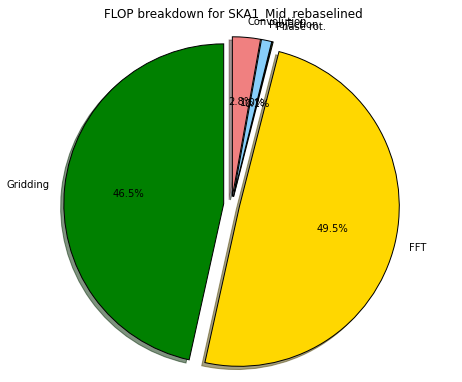

In [4]:
interact_manual(iapi.evaluate_telescope_optimized, max_baseline=(10000,200000,10000), Nf_max = (0,256000,4000), telescope=available_teles, 
         band=available_bands, mode=available_modes_all, verbose=verbose_display);

## illustrating 1D "parameter sweep" + visualization functionality.

Starting sweep of parameter facet_overlap_frac, evaluating expression Rflop over range (0.0, 0.3) in 10 steps (i.e. 11 data points)
> 0.0% done: Evaluating Rflop for facet_overlap_frac = 0
> 9.1% done: Evaluating Rflop for facet_overlap_frac = 0.03
> 18.2% done: Evaluating Rflop for facet_overlap_frac = 0.06
> 27.3% done: Evaluating Rflop for facet_overlap_frac = 0.09
> 36.4% done: Evaluating Rflop for facet_overlap_frac = 0.12
> 45.5% done: Evaluating Rflop for facet_overlap_frac = 0.15
> 54.5% done: Evaluating Rflop for facet_overlap_frac = 0.18
> 63.6% done: Evaluating Rflop for facet_overlap_frac = 0.21
> 72.7% done: Evaluating Rflop for facet_overlap_frac = 0.24
> 81.8% done: Evaluating Rflop for facet_overlap_frac = 0.27
> 90.9% done: Evaluating Rflop for facet_overlap_frac = 0.3
done with parameter sweep!


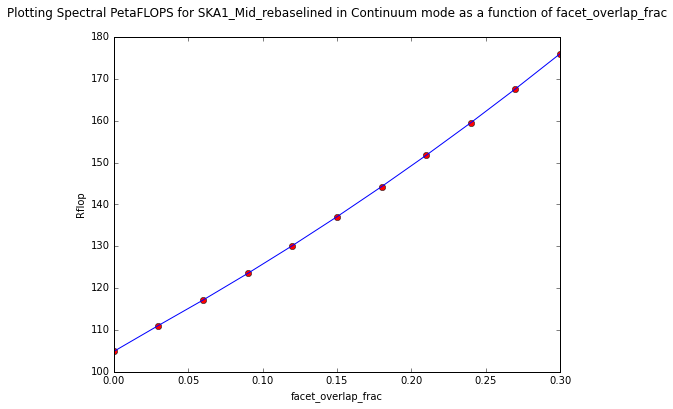

In [5]:
from IPython.display import display, HTML

expression = 'Rflop'
parameter = 'facet_overlap_frac'
param_val_min = 0.00
param_val_max = 0.30
number_steps = 10
telescope = Telescopes.SKA1_Mid
immode = ImagingModes.Continuum
band=Bands.Mid1

display(HTML('<font color="blue">Computing the result -- this may take several (tens of) seconds.</font>'))
(param_values, results) = iapi.eval_param_sweep_1d(telescope, immode, band=band, 
                                                   expression=expression, parameter=parameter, param_val_min=param_val_min,
                                                   param_val_max=param_val_max, number_steps=number_steps, verbose=False)
header = 'Plotting Spectral PetaFLOPS for %s in %s mode as a function of %s' % (telescope, immode, parameter)
iapi.plot_line_datapoints(header, param_values, np.array(results)/c.peta, xlabel=parameter, ylabel=expression)

## illustrating 2D "parameter sweep" + visualization functionality.

Evaluating expression Rflop while
sweeping parameters Na and Bmax over 2D domain [100, 512] x [40000, 80000] in 5 steps each,
for a total of 36 data evaluation points
> 0.0% done: Evaluating Rflop for (Na, Bmax) = (100.0, 40000.0)
> 2.8% done: Evaluating Rflop for (Na, Bmax) = (100.0, 48000.0)
> 5.6% done: Evaluating Rflop for (Na, Bmax) = (100.0, 56000.0)
> 8.3% done: Evaluating Rflop for (Na, Bmax) = (100.0, 64000.0)
> 11.1% done: Evaluating Rflop for (Na, Bmax) = (100.0, 72000.0)
> 13.9% done: Evaluating Rflop for (Na, Bmax) = (100.0, 80000.0)
> 16.7% done: Evaluating Rflop for (Na, Bmax) = (182.4, 40000.0)
> 19.4% done: Evaluating Rflop for (Na, Bmax) = (182.4, 48000.0)
> 22.2% done: Evaluating Rflop for (Na, Bmax) = (182.4, 56000.0)
> 25.0% done: Evaluating Rflop for (Na, Bmax) = (182.4, 64000.0)
> 27.8% done: Evaluating Rflop for (Na, Bmax) = (182.4, 72000.0)
> 30.6% done: Evaluating Rflop for (Na, Bmax) = (182.4, 80000.0)
> 33.3% done: Evaluating Rflop for (Na, Bmax) = (264.8, 4

C:\Anaconda\lib\site-packages\matplotlib\text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
C:\Anaconda\lib\site-packages\matplotlib\text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


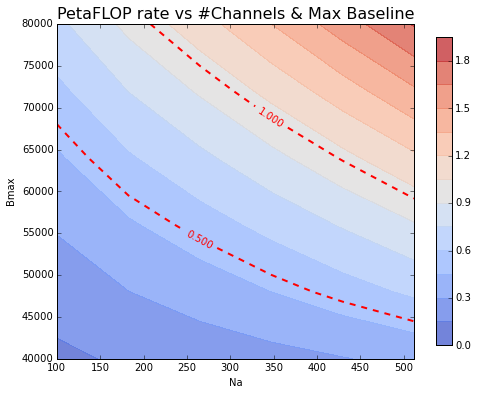

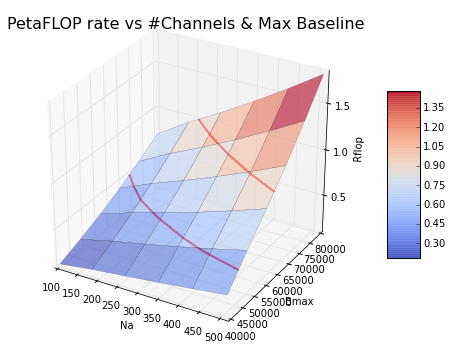

In [2]:
from IPython.display import display, HTML

telescope = Telescopes.SKA1_Low
band = Bands.Low
immode = ImagingModes.Spectral
expression = 'Rflop'
parameters = ('Na', 'Bmax')
parameter_ranges = ((100,512),(40000,80000))
number_steps = 5
verbose = False

display(HTML('<font color="blue">Computing the result -- this may take several (tens of) seconds.</font>'))
(p1_values, p2_values, results) = iapi.eval_param_sweep_2d(telescope, immode, band=band, 
                                                           expression=expression, parameters=parameters, 
                                                           params_ranges=parameter_ranges, number_steps=number_steps, 
                                                           verbose=verbose)


iapi.plot_2D_surface('PetaFLOP rate vs #Channels & Max Baseline', p1_values, p2_values, results/1e15, xlabel=parameters[0], 
                     ylabel=parameters[1], contours=np.array((0.5, 1.0)))
iapi.plot_3D_surface('PetaFLOP rate vs #Channels & Max Baseline', p1_values, p2_values, results/1e15, xlabel=parameters[0], 
                     ylabel=parameters[1], zlabel=expression, contours=np.array((0.5, 1.0)))